# CS431 - CÁC KỸ THUẬT HỌC SÂU VÀ ỨNG DỤNG

**Hướng dẫn**:
- Khởi động kernel: Ở thanh menu, chọn Kernel$\rightarrow$Restart kernel.
- Hoàn tất tất cả các mục có comment `YOUR CODE HERE`
- Chạy toàn bộ các block code để kiểm tra: Ở thanh menu, chọn Cell$\rightarrow$Run All.

---

# CÀI ĐẶT MÔ HÌNH LINEAR REGRESSION VỚI KERAS

Một mô hình máy học cần có đủ ít nhất 7 phương thức sau:
- `__init__`: hàm constructor trong hướng đối tượng, được sử dụng để khởi tạo các tham số mặc định hoặc tham số bắt đầu một mô hình. Trong những bài tập đầu tiên, để đơn giản constructor sẽ không sử dụng.
- `build`: xây dựng kiến trúc của mô hình
- `train`: bắt đầu quá trình huấn luyện mô hình
- `save`: lưu lại mô hình sau khi đã huấn luyện
- `load`: load lên mô hình từ file đã huấn luyện (pretrained)
- `summary`: in tóm tắt kiến trúc mô hình
- `predict`: dự đoán giá trị output từ dữ liệu đầu vào

In [ ]:
# Mô hình cài đặt tổng quát bao gồm 7 phương thức cơ bản
# Lưu ý: mô hình này chỉ mang tính gợi ý, không bắt buộc
# Tuy nhiên, trong phần bài tập cần tuân theo các tên phương thức này
class MyModel:
    # constructor
    def __init__(self):
        return None

    # Implement architecture of the model
    def build(self):
        return None

    # Train the defined model with training and validation data
    def train(self):
        return None

    # Save the trained model to file
    def save(self, model_path):
        return None

    # Load pretrained model from file
    def load(self):
        return None
    # Visualize your model
    def summary(self):
        return None

    # Apply your model with new input data
    def predict(self):
        return None

## 1. Import các thư viện Keras

Đầu tiên, ta sẽ import các thư viện, module, hàm của `Keras`:
- `Input`: để nhận dữ liệu đầu vào cho mô hình
- `Dense`: hay còn gọi là lớp Fully Connected (Lớp kết nối đầy đủ), một thành phần quan trọng của các mô hình dựa trên mạng Neural Network.
- `Model`: đây là lớp đối tượng mô hình được sử dụng để đóng gói lớp đầu vào, đầu ra, sau đó huấn luyện với phương thức `fit` và dự đoán kết quả với `predict`.
- `load_model`: hàm sử dụng để load mô hình lên từ file

In [ ]:
from keras.layers import Input, Dense
from keras import Model
import tensorflow as tf
from keras.models import load_model

## 2. Cài đặt mô hình Linear Regression
Tiếp theo, ta sẽ dựa trên khung đối tượng `MyModel` đã trình bày ở mục trước để tiến hành cài đặt mô hình **Linear Regression**. Phương thức chính mà bài tập này cần thực hiện là `def build()`. Các phương thức còn lại đã được cài đặt sẵn, các bạn cần đọc, hiểu ý nghĩa và cách thức sử dụng về sau.


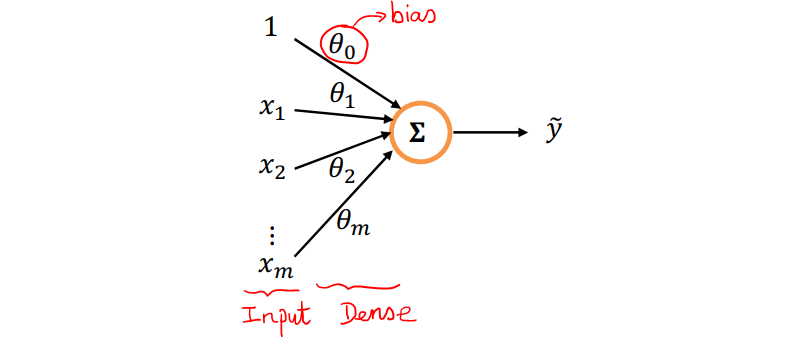

In [133]:
# Linear Regression
class LinearRegression:
    def __init__(self): # Self is similar to your 'this' pointer in C++
        return None

    def build(self, input_dim):

        self.model = None
        # Hãy cài đặt để định nghĩa KIẾN TRÚC MÔ HÌNH và lưu ở thuộc tính `self.model`
        # với các biến đối tượng sau:
        #  - tạo biến `input` với lớp đối tượng `Input` của Keras,
        #    truyền vào kích thước đầu vào `input_dim`
        #  - tạo biến `output` với lớp đối tượng `Dense` của Keras,
        #    truyền vào các tham số:  kích thước output, có sử dụng bias,
        #    không sử dụng hàm activation
        # Sau bước này, self.model sẽ đóng gói 2 biến `input` và `output` để tạo thành mô hình

        # YOUR CODE HERE
        # Define the input layer with the given input dimension
        input_layer = Input(shape=(input_dim,))
        output = Dense(1, use_bias=True, activation=None)(input_layer)
        self.model = Model(input_layer, output)
        return self.model

    def train(self, x_train, y_train):
        print(len(x_train),len(y_train))
        opt = tf.keras.optimizers.SGD(learning_rate=0.1) # Stochastic Gradient Descent
        self.model.compile(optimizer=opt, loss='mse') # MSE: mean squared error or L2 distance # (y~ - y)^2
        return self.model.fit(x_train, y_train, epochs=30)

    def save(self, model_file):
        return self.model.save(model_file)

    def load(self, model_file):
        self.model = load_model(model_file)

    def summary(self):
        self.model.summary()

    def predict(self, x_test):
        return self.model.predict(x_test)

    def get_weights(self):
        return self.model.layers[1].get_weights()

Tiếp theo, ta sẽ khởi tạo đối tượng LinearRegression và kiểm tra thử xem phương `build` đã cài đặt chính xác chưa.

In [134]:
lr = LinearRegression()
# Trong ví dụ này, ta sẽ khởi tạo input là một vector 1000 chiều:
lr.build(1000)
lr.summary()

Model: "model_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_32 (InputLayer)       [(None, 1000)]            0         
                                                                 
 dense_30 (Dense)            (None, 1)                 1001      
                                                                 
Total params: 1001 (3.91 KB)
Trainable params: 1001 (3.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [135]:
# Kiểm tra kiến trúc mạng gồm 2 lớp: Input và Output
assert len(lr.model.layers)==2
assert str(type(lr.model.layers[0])).endswith("input_layer.InputLayer'>") == True
assert str(type(lr.model.layers[1])).endswith("layers.core.dense.Dense'>") == True
assert lr.model.layers[0].input_shape[0][1] == 1000


In [ ]:
# Kiểm tra với bộ test ẩn

## 3. Tạo dữ liệu mẫu (toy example)
Bước tiếp theo, ta sẽ tiến hành tạo mẫu dữ liệu để huấn luyện và kiểm thử.

Dữ liệu được tạo ra là các điểm xoay xung quanh một đường thẳng với một số nhiễu

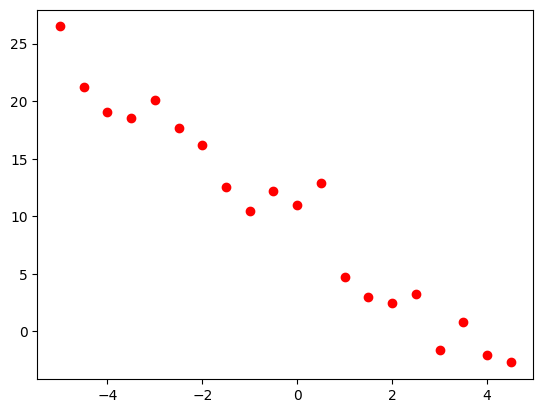

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Khởi tạo các điểm xung quanh đường thẳng y = -3*x + 10
x = np.arange(-5, 5, 0.5)
n = len(x) # Số mẫu dữ liệu

std = 2 # tham số thể hiện mức độ nhiễu nhiều hay ít. Càng lớn càng nhiễu
y = -3*x + 10 + np.random.normal(0, std, n)

# Trực quan hóa dữ liệu bằng các hình tròn màu đỏ
plt.plot(x, y, 'ro')
plt.show()

In [136]:
lr = LinearRegression()

# Hãy gọi phương thức `build` cho đối tượng `lr` và truyền tham số đầu vào
# tương ứng với dữ liệu train đã phát sinh ở code block trên
# Theo bạn, `input_dim` bằng bao nhiêu?

# YOUR CODE HERE
lr.build(1)
#raise NotImplementedError()


# Để hiển thị kiến trúc của mô hình ta gọi phương thức `summary`
print("The architecture of Linear Regression model: ")
lr.summary()

The architecture of Linear Regression model: 
Model: "model_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_33 (InputLayer)       [(None, 1)]               0         
                                                                 
 dense_31 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [137]:
# Kiểm tra bước gọi phương thức `build`
assert len(lr.model.layers)==2
assert str(type(lr.model.layers[0])).endswith("input_layer.InputLayer'>") == True
assert str(type(lr.model.layers[1])).endswith("core.dense.Dense'>") == True
print(lr.model.layers[0].input_shape[0][1])
assert lr.model.layers[0].input_shape[0][1] == 1
assert lr.model.layers[1].activation(100) == 100
assert lr.model.layers[1].units == 1
assert lr.model.layers[1].use_bias == True

1


In [138]:
# Để huấn luyện mô hình ta gọi phương thức `train` với dữ liệu mẫu đã tạo được
# Nếu bước `build` mô hình gọi đúng thì bước `train` sau sẽ thực hiện thành công
#x =  np.array(x)
#x = x.reshape((20,1))
#y = np.array(y)
#y = y.reshape((20,1))
hist = lr.train(x, y)

20 20
Epoch 1/30
1/1 [==============================] - 1s 1s/step - loss: 259.2581
Epoch 2/30
1/1 [==============================] - 0s 20ms/step - loss: 136.9464
Epoch 3/30
1/1 [==============================] - 0s 22ms/step - loss: 75.1084
Epoch 4/30
1/1 [==============================] - 0s 16ms/step - loss: 43.0451
Epoch 5/30
1/1 [==============================] - 0s 15ms/step - loss: 25.9547
Epoch 6/30
1/1 [==============================] - 0s 36ms/step - loss: 16.5811
Epoch 7/30
1/1 [==============================] - 0s 22ms/step - loss: 11.2940
Epoch 8/30
1/1 [==============================] - 0s 31ms/step - loss: 8.2336
Epoch 9/30
1/1 [==============================] - 0s 17ms/step - loss: 6.4213
Epoch 10/30
1/1 [==============================] - 0s 18ms/step - loss: 5.3273
Epoch 11/30
1/1 [==============================] - 0s 18ms/step - loss: 4.6566
Epoch 12/30
1/1 [==============================] - 0s 16ms/step - loss: 4.2404
Epoch 13/30
1/1 [==============================]

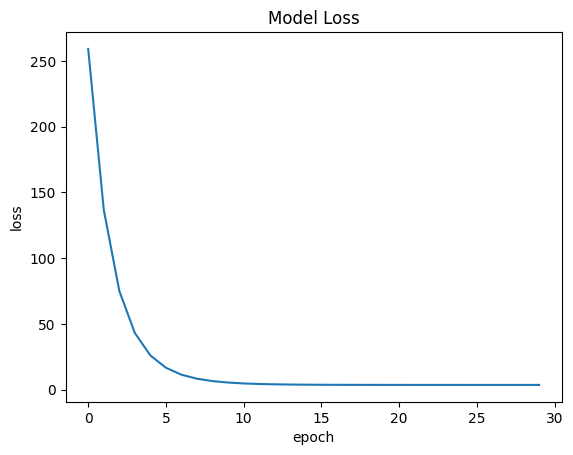

In [139]:
# Hiển thị loss theo số epoch
plt.plot(hist.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [140]:
# Sau khi đã huấn luyện, ta lưu mô hình về để sau này tái sử dụng
# Lưu ý: hai phương thức lưu mô hình `save` và tải mô hình lên 'load'
# được sử dụng khi muốn tái sử dụng nhiều lần mà KHÔNG CẦN PHẢI HUẤN LUYỆN LẠI
lr.save('linear_regression_model.h5')

## 5. Trực quan hóa mô hình và dự đoán với dữ liệu test

In [141]:
# Khởi tạo đối tượng mới và gọi phương thức load mô hình từ file
pretrain_lr = LinearRegression()
pretrain_lr.load('linear_regression_model.h5')

In [142]:
theta = pretrain_lr.get_weights()
print('Tham số tối ưu: ')
print(theta)
bias = theta[1][0] # bias chính là theta0 trong mô hình gốc
theta1 = theta[0][0][0]
print('Trong đó: ')
print('   - bias (hệ số tự do) : ', bias)
print('   - theta (hệ số cho dữ liệu đầu vào): ', theta1)

Tham số tối ưu: 
[array([[-2.9077797]], dtype=float32), array([9.569955], dtype=float32)]
Trong đó: 
   - bias (hệ số tự do) :  9.569955
   - theta (hệ số cho dữ liệu đầu vào):  -2.9077797


Như ta có thể thấy, tham số tối ưu xấp xỉ với mô hình gốc được sử dụng để khởi tạo dữ liệu:

`y = -3*x + 10 + np.random.normal(0, std, n)`

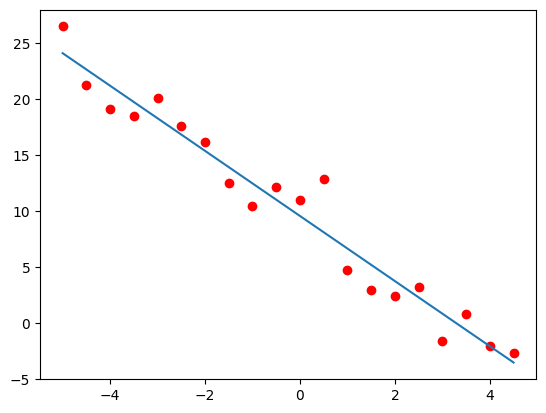

In [143]:
# Trực quan hóa dữ liệu và mô hình sau khi huấn luyện
plt.plot(x, y, 'ro')

# Trực quan hóa mô hình
plt.plot([x[0],x[-1]], [theta1*x[0]+bias, theta1*x[-1]+bias])
plt.show()

Như vậy ta có thể thấy rằng, các hệ số đã huấn luyện tương ứng đã tạo thành phương trình đường thẳng đi qua các điểm mẫu huấn luyện.

Tiếp theo, ta sẽ thử nghiệm với dữ liệu x_test với 2 trường hợp: -4, 0 và 4.

Dựa trên biểu đồ, ta đoán rằng y_test sẽ nhận giá trị lân cận các giá trị
trên 20, xấp xỉ 10 và 0.

In [144]:
x_test = [-4, 0, 4]
x_test = np.array(x_test)
x_test = x_test.reshape((len(x_test),1))
y_pred = pretrain_lr.predict(x_test)

print("Các giá trị mà mô hình hồi quy dự đoán trên x_test: ", x_test)
print(y_pred)

1/1 [==============================] - 0s 45ms/step
Các giá trị mà mô hình hồi quy dự đoán trên x_test:  [[-4]
 [ 0]
 [ 4]]
[[21.201073]
 [ 9.569955]
 [-2.061164]]


Các giá trị này khá khớp với giá trị dự đoán ở trên.